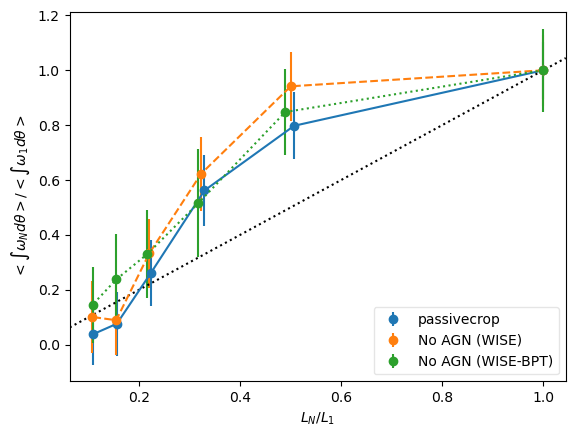

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

fig, ax = plt.subplots()

nbootstrap = 100
samples = ['passivecrop','sinAGNWISE','sinAGNWISEniBPT']
colors = ['C00','C01','C02']
labels = ['passivecrop','No AGN (WISE)','No AGN (WISE-BPT)']
fmts = ['o-','o--','o:']
nquant = 6

for sample,c,fmt in zip(samples,colors,fmts):
    filename = f'../data/int_L_nq{nquant}_nbs{nbootstrap}_{sample}.npz'
    data = ascii.read(filename)#,names=names)
    ax.errorbar(data['L_ratio'],data['int_ratio'],yerr=data['int_std'],c=c,fmt=fmt)

ax.axline((1,1),slope=1,c='k',ls=':')
ax.set_ylabel(r'$<\int\omega_Nd\theta>/<\int\omega_1d\theta>$')
ax.set_xlabel(r'$L_N/L_1$')

#Legend
handles = [plt.errorbar([],[],yerr=1,color=colors[i],fmt='o') \
           for i in range(len(samples))]#,\
#labels_ = labels[:len(nquants)]
plt.legend(handles, labels, loc=4, fancybox=True, framealpha=0.5)

plotname = f'int_L_nquant{nquant}_AGNcomparison.png'
plt.savefig('../plots/'+plotname)

plt.show()